In [10]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [56]:
paths =['C:\\Users\\akash\\FILES\\Research\\V2F\\Face_Det\\id00081\\vvLu_7TpP8c\\00203.jpg',
       'C:\\Users\\akash\\FILES\\Research\\V2F\\Face_Det\\id00081\\w0Jxv9zDAEg\\00242.jpg',
       'C:\\Users\\akash\\FILES\\Research\\V2F\\Face_Det\\id00081\\wAAMEC1OsRc\\00271.jpg',
       'C:\\Users\\akash\\FILES\\Research\\V2F\\Face_Det\\id00081\\WJKmYaDUs20\\00107.jpg',
       'C:\\Users\\akash\\FILES\\Research\\V2F\\Face_Det\\id00081\\W_KwXZ91imU\\00121.jpg']

In [58]:
mfcc_paths =['C:\\Users\\akash\\FILES\\Research\\V2F\\test_audio_MFFC\\aac\\id00081\\vvLu_7TpP8c\\00203.png',
 'C:\\Users\\akash\\FILES\\Research\\V2F\\test_audio_MFFC\\aac\\id00081\\w0Jxv9zDAEg\\00242.png',
 'C:\\Users\\akash\\FILES\\Research\\V2F\\test_audio_MFFC\\aac\\id00081\\wAAMEC1OsRc\\00271.png',
 'C:\\Users\\akash\\FILES\\Research\\V2F\\test_audio_MFFC\\aac\\id00081\\WJKmYaDUs20\\00107.png',
 'C:\\Users\\akash\\FILES\\Research\\V2F\\test_audio_MFFC\\aac\\id00081\\W_KwXZ91imU\\00121.png']

In [59]:
def read(p):
    img=cv2.imread(p.split('\n')[0])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=  cv2.resize(img,(128,128))
    img=img/255.
    return img
mfcc= []
ori_imgs=[]
for p in mfcc_paths:
    mfcc.append(read(p))
for p in paths:
    ori_imgs.append(read(p))

In [60]:
encoder = tf.keras.models.load_model('encoder.h5')
decoder = tf.keras.models.load_model('decoder.h5')


In [61]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496 

In [62]:
decoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1, 1, 768)]       0         
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 model_2 (Functional)        (None, 128, 128, 3)       1044963   
                                                                 
Total params: 1,044,963
Trainable params: 1,044,189
Non-trainable params: 774
_________________________________________________________________


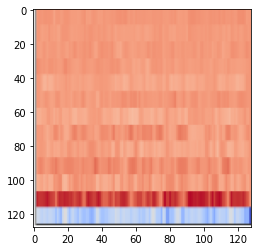

In [63]:
plt.imshow(mfcc[0])

In [64]:
encoder_outputs = encoder(np.array(mfcc))

In [65]:
encoder_outputs.shape

TensorShape([5, 1, 1, 768])

In [66]:
decoder_outputs = decoder(encoder_outputs)

In [67]:
decoder_outputs.shape

TensorShape([5, 128, 128, 3])

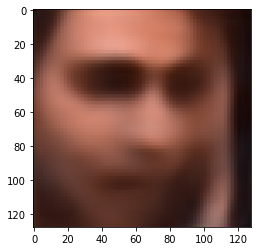

In [70]:
plt.imshow(decoder_outputs[0])

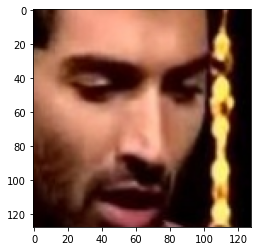

In [71]:
 plt.imshow(ori_imgs[0])